In [20]:
import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import scipy
import librosa.display
plt.figure(dpi=600) # 将显示的所有图分辨率调高
matplotlib.rc("font",family='SimHei') # 显示中文 
matplotlib.rcParams['axes.unicode_minus']=False # 显示符号


def displayWaveform(path,ax,title): # 显示语音时域波形
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    samples, sr = librosa.load(path, sr=16000)
    # samples = samples[6000:16000]

    #print(len(samples), sr)
    time = np.arange(0, len(samples)) * (1.0 / sr)
    #plt.subplot(3,2,1)
    plt.plot(time, samples)
    plt.title(title,fontproperties="SimSun")
    plt.xlabel("Time")
    plt.ylabel("Amplitutde")
    # plt.savefig("your dir\语音信号时域波形图", dpi=600)
    #plt.show()
def displaySpectrogram(path,ax,title,fig):
    x, sr = librosa.load(path, sr=16000)
    # compute power spectrogram with stft(short-time fourier transform):
    # 基于stft，计算power spectrogram
    #print(librosa.stft(x))
    spectrogram = librosa.amplitude_to_db(librosa.stft(x))
    img=librosa.display.specshow(spectrogram,x_axis='time', y_axis='log')
    ax.set_title(title, fontproperties="SimSun")
    #fig.colorbar(img, ax=ax, format="%+2.f dB") 
    # plt.colorbar(format='%+2.0f dB')
    # plt.subplot(3,2,2)
    # plt.title('Original Audio')#对数谱图
    # plt.xlabel('time (s)')
    # plt.ylabel('Frequency (hz)')
    # plt.show()
def displayMel(path,ax,title):
    path = "/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0008.wav"
    # sr=None声音保持原采样频率， mono=False声音保持原通道数
    data, fs = librosa.load(path, sr=16000, mono=False)

    L = len(data)
    #print('Time:', L / fs)


    # 0.025s
    framelength = 0.025
    # NFFT点数=0.025*fs
    framesize = int(framelength * fs)
    #print("NFFT:", framesize)

    #提取mel特征
    mel_spect = librosa.feature.melspectrogram(data, sr=fs, n_fft=framesize)
    #print(mel_spect)
    #转化为log形式
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

    #画mel谱图
    img = librosa.display.specshow(mel_spect, sr=fs, x_axis='time', y_axis='mel')
    return img
    # plt.subplot(3,2,2)
    # plt.ylabel('Mel Frequency')
    # plt.xlabel('Time(s)')
    # plt.title('Mel Spectrogram')
    # plt.show()


<Figure size 3840x2880 with 0 Axes>

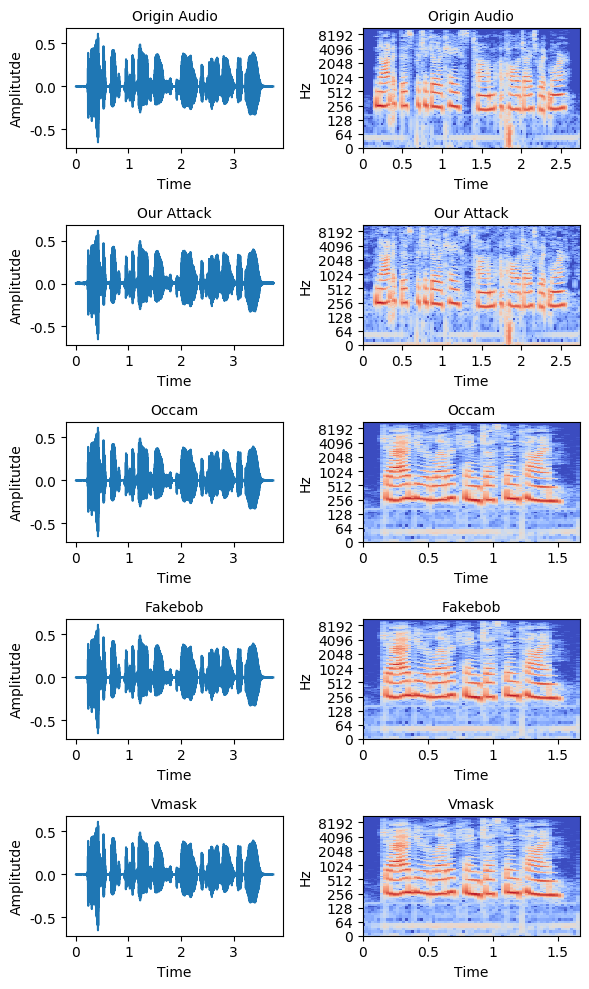

In [21]:
# displayWaveform()
fig = plt.figure(figsize=(6, 10)) 
ax0 = fig.add_subplot(521)
displayWaveform("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav",ax0,"Origin Audio")
ax = fig.add_subplot(522)
displaySpectrogram("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav",ax,"Origin Audio",fig)
ax = fig.add_subplot(523)
displayWaveform("/mnt/data/Chenpinji/xvectorAudio/final/cmu3_2cmu7_8_snr2479_sc6243.wav",ax,"Our Attack")
ax = fig.add_subplot(524)
displaySpectrogram("/mnt/data/Chenpinji/xvectorAudio/final/cmu3_2cmu7_8_snr2479_sc6243.wav",ax,"Our Attack",fig)
ax = fig.add_subplot(525)
displayWaveform("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav",ax,"Occam")
ax = fig.add_subplot(526)
displaySpectrogram("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0008.wav",ax,"Occam",fig)
ax = fig.add_subplot(527)
displayWaveform("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav",ax,"Fakebob")
ax = fig.add_subplot(528)
displaySpectrogram("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0008.wav",ax,"Fakebob",fig)
ax = fig.add_subplot(529)
displayWaveform("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav",ax,"Vmask")
ax = fig.add_subplot(5,2,10)
displaySpectrogram("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0008.wav",ax,"Vmask",fig)
plt.tight_layout()
plt.show()

/home/ubuntu/.local/lib/python3.7/site-packages/librosa/core/spectrum.py:1029: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


AttributeError: 'AxesSubplot' object has no attribute 'get_array'

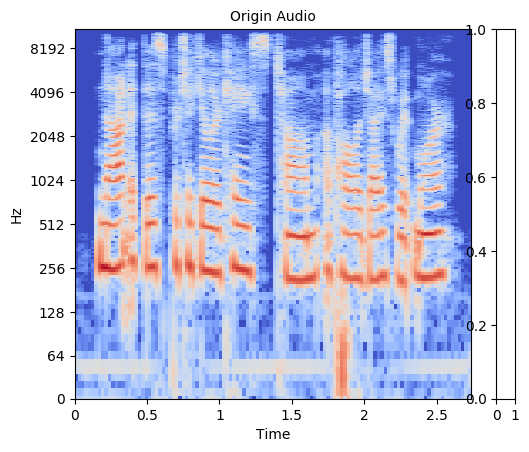

In [3]:
def plotmel(path,title):
    x, sr = librosa.load(path, sr=16000)
    # compute power spectrogram with stft(short-time fourier transform):
    # 基于stft，计算power spectrogram
    #print(librosa.stft(x))
    fig, ax = plt.subplots(1,1)
    spectrogram = librosa.amplitude_to_db(librosa.stft(x))
    img=librosa.display.specshow(spectrogram,x_axis='time', y_axis='log')
    plt.title(title, fontproperties="SimSun")
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.show()

plotmel("/mnt/data/Chenpinji/cmu_dataset/cmu3/wav/arctic_a0002.wav","Origin Audio")
